In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
#     explored_models_20200725_generator,
    explored_models_20201218_tang_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [2]:
import pandas as pd

In [3]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.gaya import get_neural_data
raw_data = get_neural_data(dataset='tang', return_raw=True, start_offset=0, end_offset=500)
# cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
# assert cc_max_all_neurons.shape == (79,)
import numpy as np
# use first eight trials to get ccmax.
# each image at least has 8 trials. this will be a bit inaccurate but should be ok. with similar results as 
# a more proper way to get ccmax.
a = np.asarray([x[:8] for x in raw_data]).T
print(a.shape)  # (num_neuron x num_trial x num_time)
cc_max_all_neurons=cc_max(a)
assert cc_max_all_neurons.shape==(34,)

(34, 8, 2250)


In [4]:
f_main_result = join(dir_dict['analyses'], 'tang_refactored', '20201218', 'main_result.pkl')
makedirs(dirname(f_main_result), exist_ok=True)
if not exists(f_main_result):
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 37,
        'split_seed': 'legacy',
        'dataset_prefix': 'tang',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
        'additional_key': '0,500',
        'multi_path': True,
        'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201218_tang_generator(with_source=True),
            # more iterations cause OOM
    #             explored_models_20200801_generator(with_source=True),
    #             explored_models_20200725_generator(with_source=True),
        ),
        total_num_param=30,
        train_size_mapping=dict(),
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=34,
        skip_eval_json=True,
        no_missing_data=False,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900


In [5]:
df_main_result

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          geD1            2         16          2           cm-avg       1400              0.454640   
                                                                                                     cm-last      1400              0.483079   
                                                                                                     inst-avg     1400              0.461975   
                                                                                                     inst-last    1400              0.482507   
                                                                                         3           cm-avg       1400              0.471736   
...                                                                                                                                      ...   
softplus True                 poisson   1          leD7            2         16          7           inst-last    1400              0.472804   
                                                                             32          7           cm-avg       1400              0.494710   
                                                                                                     cm-last      1400              0.490256   
                                                                                                     inst-avg     1400              0.503619   
                                                                                                     inst-last    1400              0.482094   

                                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          geD1            2         16          2           cm-avg       1400           0.422232   
                                                                                                     cm-last      1400           0.447912   
                                                                                                     inst-avg     1400           0.428767   
                                                                                                     inst-last    1400           0.447208   
                                                                                         3           cm-avg       1400           0.437532   
...                                                                                                                                   ...   
softplus True                 poisson   1          leD7            2         16          7           inst-last    1400           0.438697   
                                                                             32          7           cm-avg       1400           0.459252   
                                                                                                     cm-last      1400           0.454983   
                                                                                                     inst-avg     1400           0.466844   
                                                                                                     inst-last    1400           0.447450   

                                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          geD1            2         16          2           cm-avg       1400          0.625033   

In [6]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          geD1            2         16          2           cm-avg       1400              0.454640   
                                                                                                     cm-last      1400              0.483079   
                                                                                                     inst-avg     1400              0.461975   
                                                                                                     inst-last    1400              0.482507   
                                                                                         3           cm-avg       1400              0.471736   
...                                                                                                                                      ...   
softplus True                 poisson   1          leD7            2         16          7           inst-last    1400              0.472804   
                                                                             32          7           cm-avg       1400              0.494710   
                                                                                                     cm-last      1400              0.490256   
                                                                                                     inst-avg     1400              0.503619   
                                                                                                     inst-last    1400              0.482094   

                                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          geD1            2         16          2           cm-avg       1400           0.422232   
                                                                                                     cm-last      1400           0.447912   
                                                                                                     inst-avg     1400           0.428767   
                                                                                                     inst-last    1400           0.447208   
                                                                                         3           cm-avg       1400           0.437532   
...                                                                                                                                   ...   
softplus True                 poisson   1          leD7            2         16          7           inst-last    1400           0.438697   
                                                                             32          7           cm-avg       1400           0.459252   
                                                                                                     cm-last      1400           0.454983   
                                                                                                     inst-avg     1400           0.466844   
                                                                                                     inst-last    1400           0.447450   

                                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          geD1            2         16          2           cm-avg       1400          0.625033   

In [7]:
df_main_result_original = df_main_result.dropna().xs('geD1', level='multi_path_hack')

In [8]:
df_main_result_original

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         16          2           cm-avg       1400              0.454640   
                                                                                     cm-last      1400              0.483079   
                                                                                     inst-avg     1400              0.461975   
                                                                                     inst-last    1400              0.482507   
                                                                         3           cm-avg       1400              0.471736   
...                                                                                                                      ...   
softplus True                 poisson   1          2         32          6           inst-last    1400              0.483945   
                                                                         7           cm-avg       1400              0.494710   
                                                                                     cm-last      1400              0.490256   
                                                                                     inst-avg     1400              0.498510   
                                                                                     inst-last    1400              0.482094   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         16          2           cm-avg       1400           0.422232   
                                                                                     cm-last      1400           0.447912   
                                                                                     inst-avg     1400           0.428767   
                                                                                     inst-last    1400           0.447208   
                                                                         3           cm-avg       1400           0.437532   
...                                                                                                                   ...   
softplus True                 poisson   1          2         32          6           inst-last    1400           0.448392   
                                                                         7           cm-avg       1400           0.459252   
                                                                                     cm-last      1400           0.454983   
                                                                                     inst-avg     1400           0.462317   
                                                                                     inst-last    1400           0.447450   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         16          2           cm-avg       1400          0.625033   
                                                                                     cm-last      1400          0.645806   
                                                                                     inst-avg     1400          0.629232   
                                                                                     inst-last    1400          0.644833   
                                                                         3 

In [9]:
# take main results and compare
def load_ref_result():
    # take main results and compare
    f_main_result_ref = join(dir_dict['analyses'], 'tang_refactored', '20201002', 'main_result_0,500.pkl')
    f_main_result_2_ref = join(dir_dict['analyses'], 'tang_refactored', '20201018', 'main_result_0,500.pkl')

    df_main_result_ref = pd.read_pickle(f_main_result_ref)
    assert df_main_result_ref.index.is_unique
    df_main_result_2_ref = pd.read_pickle(f_main_result_2_ref)
    assert df_main_result_2_ref.index.is_unique
    df_main_result_ref = pd.concat([df_main_result_ref, df_main_result_2_ref], axis=0).sort_index()
    assert df_main_result_ref.index.is_unique

    del df_main_result_2_ref
    return df_main_result_ref

df_main_result_ref = load_ref_result()

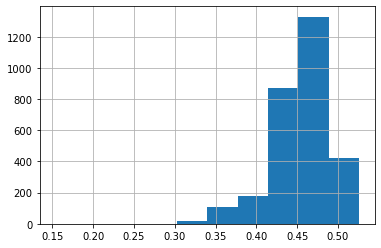

In [10]:
df_main_result_ref.xs(1400, level='train_keep')['cc2_normed_avg'].hist()

In [11]:
aaaa = df_main_result_ref.join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

from scipy.stats import pearsonr, spearmanr

In [13]:
# try to replicate results in 
# 20201114_collect-separatebn.ipynb
# and
# 20201118_collect-separatebn.ipynb
def compute_correlations():
    # 5120
    plt.close('all')
    fig, axes = plt.subplots(nrows=2, ncols=4, squeeze=True, figsize=(20, 12), sharex=True, sharey=True)
    axes = axes.ravel()
    aaaaaa = aaaa.xs(1400, level='train_keep')
    idx_ax = -1
    for idx1, train_keep in enumerate(aaaaaa.index.get_level_values('out_channel').unique()):
        bbb = aaaaaa.xs(train_keep, level='out_channel')
        for idx2, num_layer in enumerate(bbb.index.get_level_values('num_layer').unique()):
            bb = bbb.xs(num_layer, level='num_layer')
            for idx3, readout_type in enumerate( bb.index.get_level_values('readout_type').unique()):
                idx_ax += 1
                ax = axes[idx_ax]
                b = bb.xs(readout_type, level='readout_type')
                n = b.shape[0]
                r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                r_spearman = spearmanr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                           label='ch {}, num_l {}, {}, n={}, r={:.2f}/{:.2f}'.format(
                               train_keep, num_layer, readout_type, n, r, r_spearman
                           )
                          )
                
                ax.set_xlabel('ref')
                ax.set_ylabel('new')
                ax.plot([0.25,0.75],[0.25,0.75],linestyle='--',color='k')
                ax.legend()

                # compute pearson
                print(train_keep, num_layer, readout_type)
        
        
    
    plt.show()

In [14]:
# take results from 
# 20201114_collect-separatebn.ipynb and 20201118_collect-separatebn.ipynb
# and compare
df_main_result_ref2 = pd.read_pickle(
    join(dir_dict['analyses'], 'tang_refactored', '20201215', 'main_result_separatebn.pkl')
).dropna()

In [15]:
df_main_result_ref2

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       350               0.274533   
                                                                                                  700               0.341033   
                                                                                                  1400              0.430401   
                                                                                     cm-last      350               0.322434   
                                                                                                  700               0.385417   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          4           inst-avg     700               0.438061   
                                                                                                  1400              0.498031   
                                                                                     inst-last    350               0.278328   
                                                                                                  700               0.398642   
                                                                                                  1400              0.495794   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           cm-avg       350            0.256178   
                                                                                                  700            0.318178   
                                                                                                  1400           0.399750   
                                                                                     cm-last      350            0.299983   
                                                                                                  700            0.359265   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          4           inst-avg     700            0.407460   
                                                                                                  1400           0.461753   
                                                                                     inst-last    350            0.259608   
                                                                                                  700            0.371349   
                                                                                                  1400           0.459311   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           cm-avg       350           0.460191   
                                                                                                  700           0.519233   
                                                                                                  1400          0.604148   
                                                                                     cm-last      350           0.504304   
                                                                           

In [16]:
aaaa = df_main_result_ref2.join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

In [17]:
aaaa

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         16          2           cm-avg       1400                  0.454640   
                                                                                     cm-last      1400                  0.483079   
                                                                                     inst-avg     1400                  0.461975   
                                                                                     inst-last    1400                  0.482507   
                                                                         3           cm-avg       1400                  0.471736   
...                                                                                                                          ...   
softplus True                 poisson   1          2         32          6           inst-last    1400                  0.483945   
                                                                         7           cm-avg       1400                  0.494710   
                                                                                     cm-last      1400                  0.490256   
                                                                                     inst-avg     1400                  0.498510   
                                                                                     inst-last    1400                  0.482094   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
relu     False                mse       0          2         16          2           cm-avg       1400               0.422232   
                                                                                     cm-last      1400               0.447912   
                                                                                     inst-avg     1400               0.428767   
                                                                                     inst-last    1400               0.447208   
                                                                         3           cm-avg       1400               0.437532   
...                                                                                                                       ...   
softplus True                 poisson   1          2         32          6           inst-last    1400               0.448392   
                                                                         7           cm-avg       1400               0.459252   
                                                                                     cm-last      1400               0.454983   
                                                                                     inst-avg     1400               0.462317   
                                                                                     inst-last    1400               0.447450   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         16          2           cm-avg       1400              0.625033   
                                                                                     cm-last      1400              0.645806   
                                                                                     inst-avg     1400              0.629232   
                                                                           

16 2 cm-avg
16 2 cm-last
16 2 inst-avg
16 2 inst-last
32 2 cm-avg
32 2 cm-last
32 2 inst-avg
32 2 inst-last


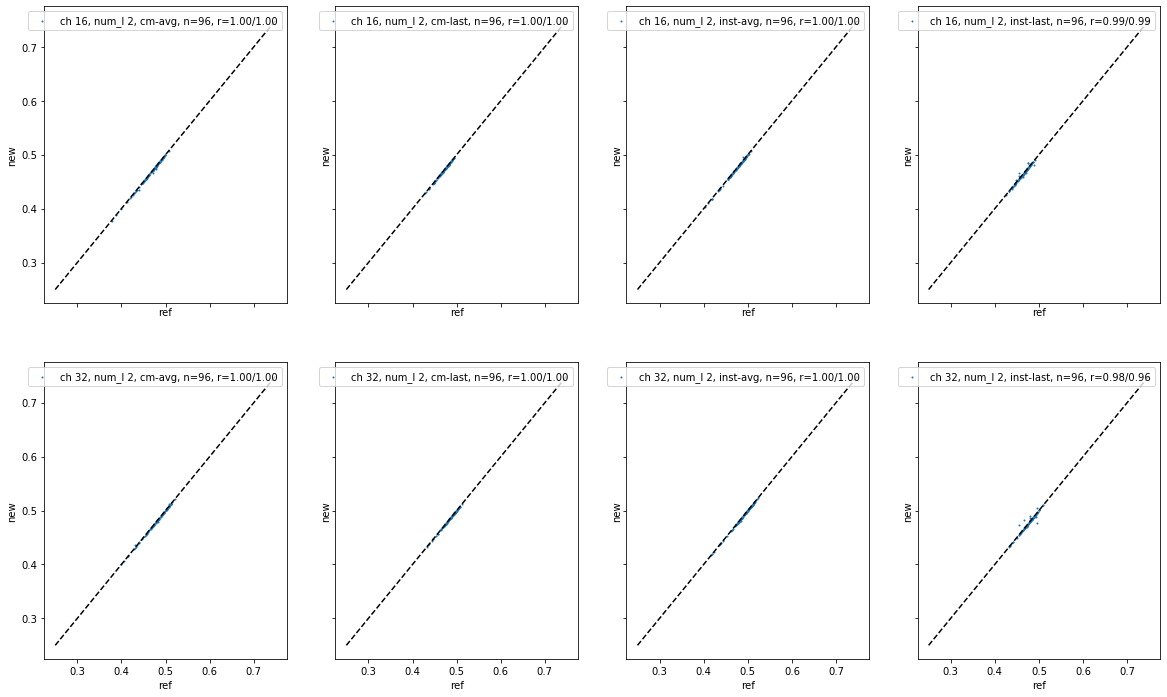

In [18]:
compute_correlations()
# card to card variation... interesting.

In [19]:
def collect_max_d_model():
    ret = df_main_result[
        df_main_result.index.get_level_values(
            'multi_path_hack'
            # here .values is important. otherwise this code does not work properly. not sure why.
            # pandas is complicated.
        ).map(lambda x: x.startswith('leD')).values & (
             df_main_result.index.get_level_values('multi_path_hack').map(lambda x: int(x[3:])) ==  df_main_result.index.get_level_values('rcnn_bl_cls')
        )
    ]
                                                                                             
    return ret.droplevel('multi_path_hack').dropna()

In [20]:
aaaa = collect_max_d_model().join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

32 2 inst-last
32 2 inst-avg
32 2 cm-avg
32 2 cm-last
16 2 inst-avg
16 2 cm-last
16 2 inst-last
16 2 cm-avg


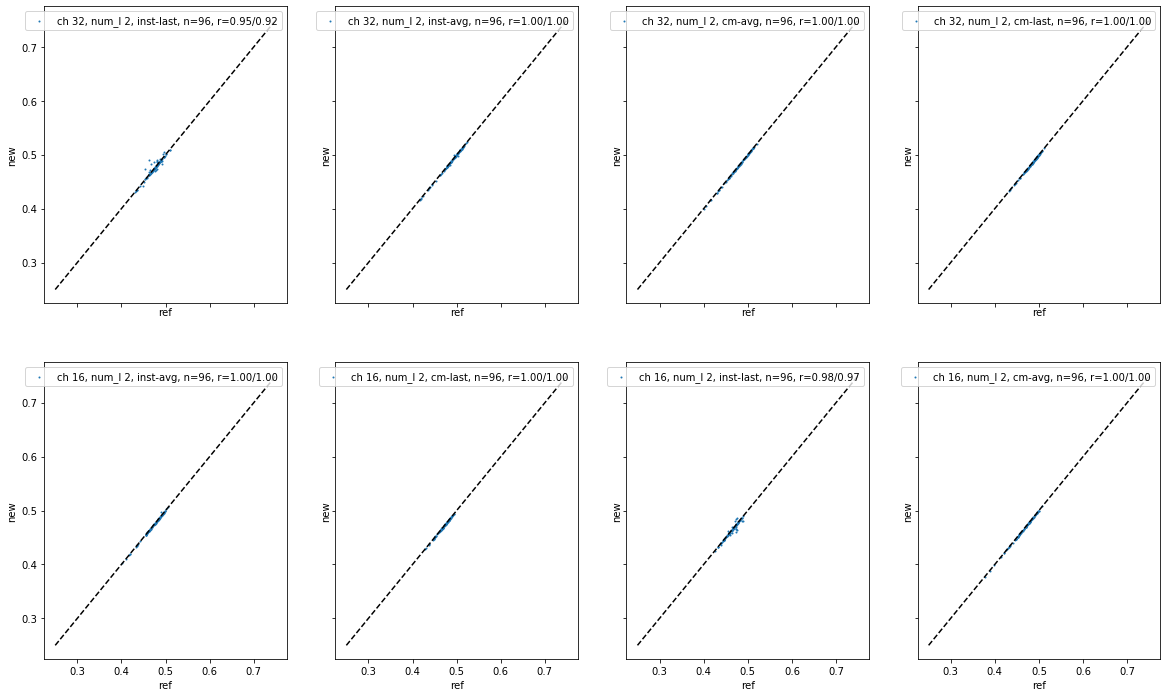

In [21]:
compute_correlations()
# card to card variations from geD1 to leDX. interesting.
# will use all available data from three sources as baseline.